#### Objective: Improve Customer Experience By Analysing Sales Data and Increase Revenue

#### Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import csv file
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 14)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
 12  Status            0 non-null      float64
 13  Unnamed           0 non-null      float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


In [6]:
# Drop the blank columns
df.drop(['Status', 'Unnamed'], axis = 1, inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age               11251 non-null  int64  
 5   Marital_Status    11251 non-null  int64  
 6   State             11251 non-null  object 
 7   Zone              11251 non-null  object 
 8   Occupation        11251 non-null  object 
 9   Product_Category  11251 non-null  object 
 10  Orders            11251 non-null  int64  
 11  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 1.0+ MB


In [8]:
pd.isnull(df)

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
# Filter rows with atleast one null value
rows_with_nulls = df[df.isnull().any(axis = 1)]

In [11]:
print("Rows With Nulls")

Rows With Nulls


In [43]:
print(rows_with_nulls)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status           State  \
7    1002092  Shivangi  P00273442      F   61               0     Maharashtra   
14   1003858      Cano  P00293742      M   46               1  Madhya Pradesh   
16   1005447       Amy  P00275642      F   48               1  Andhra Pradesh   
109  1005265    Sakshi  P00296242      F   48               1           Delhi   
111  1005261   Apoorva  P00057942      F   41               1           Delhi   
184  1005538    Kartik  P00269542      F   49               1       Karnataka   
293  1000326  Jonathan  P00120542      M   53               0         Gujarat   
344  1002507   Lakshmi  P00045842      F   35               1         Gujarat   
345  1004498   Srishti  P00030842      F   55               0           Delhi   
452  1004601    Gaurav  P00014442      F   40               1  Madhya Pradesh   
464  1004528    Anurag  P00338442      F   33               1   Uttar Pradesh   
493  1002994    Hemant   P00

In [12]:
#Calculate mean for each category and fillna with mean for that category
df['Amount'] = df.groupby('Product_Category')['Amount'].transform(lambda x: x.fillna(x.mean()))

In [13]:
selected_rows = df[(df['User_ID'] == 1000326) & (df['Product_ID'] == 'P00120542')]
print(selected_rows)

     User_ID Cust_name Product_ID Gender  Age  Marital_Status    State  \
293  1000326  Jonathan  P00120542      M   53               0  Gujarat   

        Zone Occupation  Product_Category  Orders        Amount  
293  Western  IT Sector  Footwear & Shoes       3  14707.468791  


In [14]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
#change datatype
df['Amount'] = df['Amount'].astype('int')

In [16]:
df['Amount'].dtypes

dtype('int64')

In [17]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount'],
      dtype='object')

In [18]:
#rename column
df.rename(columns={'Marital_Status': 'Married'})

,User_ID,Cust_name,Product_ID,Gender,Age,Married,State,Zone,Occupation,Product_Category,Orders,Amount,Status,Unnamed
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952,NaN,NaN
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934,NaN,NaN
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924,NaN,NaN
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912,NaN,NaN
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367,NaN,NaN
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213,NaN,NaN
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206,NaN,NaN


In [24]:
#describe() method returns description of the data in the DataFrame (i.e.:, mean, std, count etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9460.454626
std,1.716125e+03,12.754122,0.493632,1.115047,5224.434220
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.500000
50%,1.003065e+06,33.000000,0.000000,2.000000,8110.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12691.500000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [19]:
# Define a function to categorize age
def categorize_age(age):
    if age <= 17:
        return '0-17'
    elif age <= 25:
        return '18-25'
    elif age <= 35:
        return '26-35'
    elif age <= 45:
        return '36-45'
    elif age <= 50:
        return '46-50'
    elif age <= 55:
        return '51-55'
    else:
        return '55+'

# Apply the function to create a new column 'age_group'
df['Age_Group'] = df['Age'].apply(categorize_age)
print(df)

       User_ID    Cust_name Product_ID Gender  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F   28               0   
1      1000732       Kartik  P00110942      F   35               1   
2      1001990        Bindu  P00118542      F   35               1   
3      1001425       Sudevi  P00237842      M   16               0   
4      1000588         Joni  P00057942      M   28               1   
...        ...          ...        ...    ...  ...             ...   
11246  1000695      Manning  P00296942      M   19               1   
11247  1004089  Reichenbach  P00171342      M   33               0   
11248  1001209        Oshin  P00201342      F   40               0   
11249  1004023       Noonan  P00059442      M   37               0   
11250  1002744      Brumley  P00281742      F   19               0   

                State      Zone       Occupation Product_Category  Orders  \
0         Maharashtra   Western       Healthcare             Auto       1   
1    

#### EDA - Exploratory Data Analysis

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

Gender

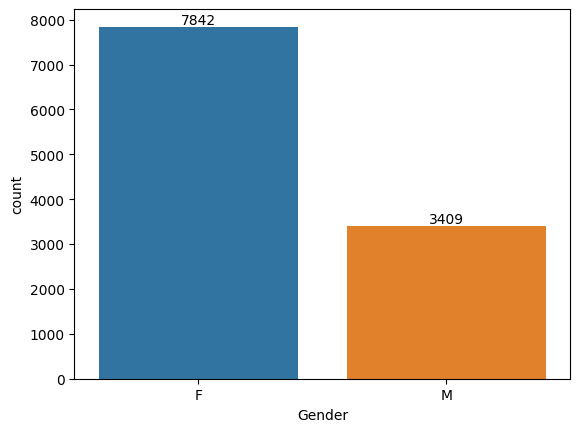

In [22]:
# Plotting a Bar Chart for Gender and its Count

ax = sns.countplot(x = 'Gender', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

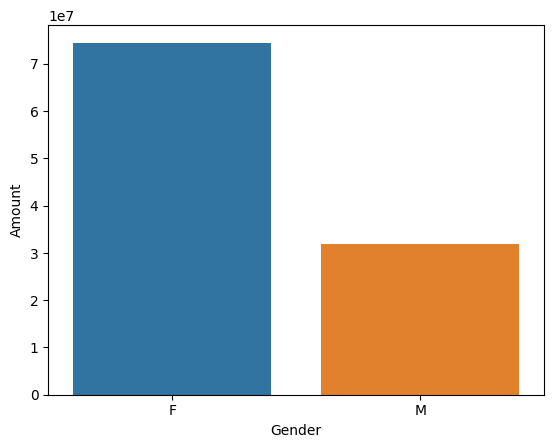

In [23]:
# Plotting a Bar Chart for gender vs total amount

sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen, hue = 'Gender', legend = False)

* From above graphs, we can see that most of the buyers are females and even the purchasing power of females are greater than male. *

AGE

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

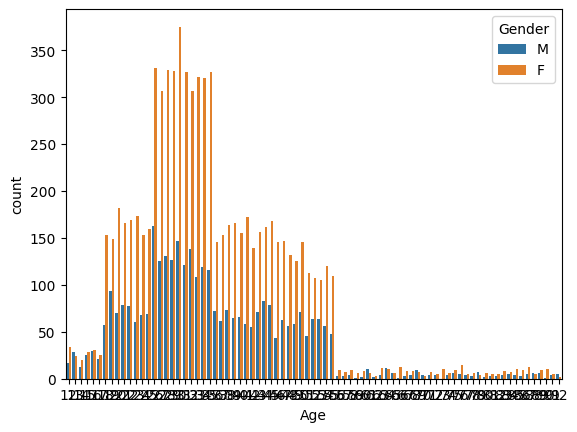

In [25]:
ax = sns.countplot(x = 'Age', data = df, hue = 'Gender')

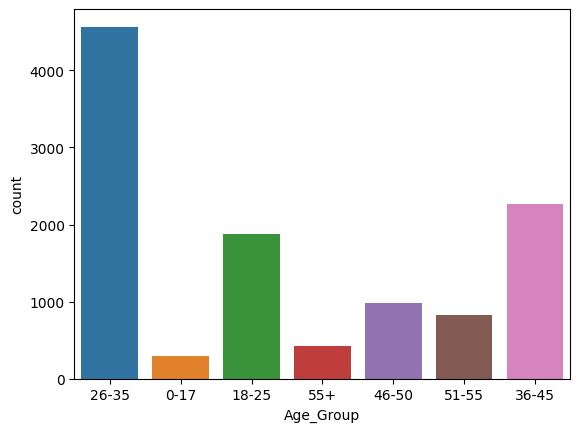

In [26]:
ax = sns.countplot(x = 'Age_Group', data = df, hue = 'Age_Group', legend = False)

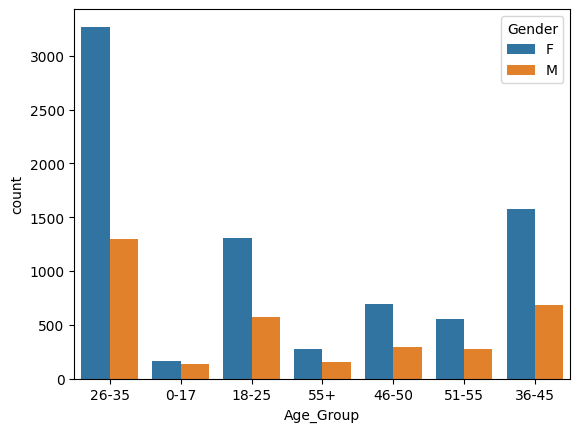

In [27]:
ax = sns.countplot(x = 'Age_Group', data = df, hue = 'Gender')

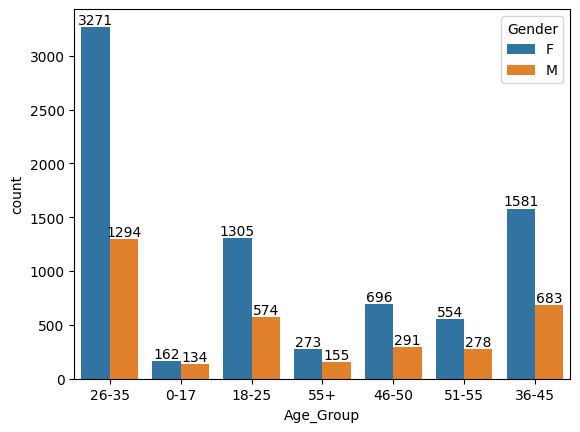

In [28]:
ax = sns.countplot(x = 'Age_Group', data = df, hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age_Group', ylabel='Amount'>

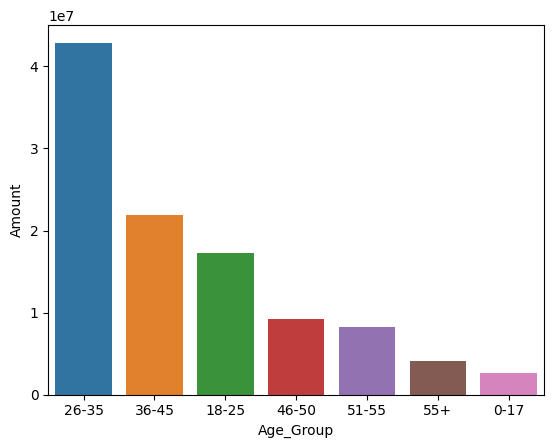

In [30]:
# Total Amount vs Age Group
sales_age = df.groupby(['Age_Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)

sns.barplot(x = 'Age_Group', y = 'Amount', data = sales_age, hue = 'Age_Group')

From above graphs, we can see that most of the buyers are is of the age group between 26-35 females.

State

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

C:\Users\ritam\AppData\Local\Temp\ipykernel_13232\1737683775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'State', y = 'Orders', data = sales_state, palette = 'spring')


<Axes: xlabel='State', ylabel='Orders'>

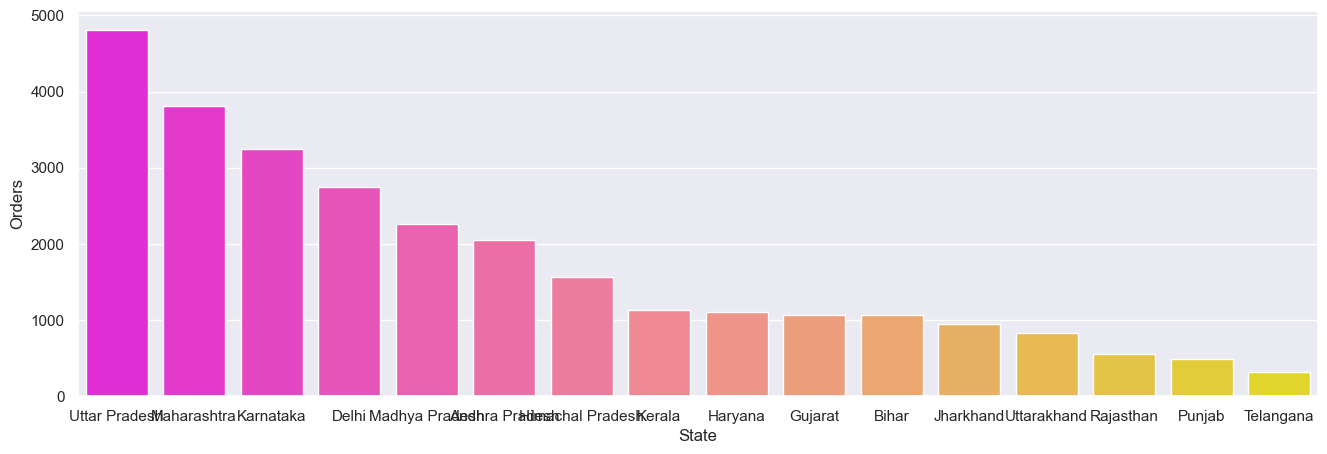

In [32]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Orders', data = sales_state, palette = 'spring')

<Axes: xlabel='State', ylabel='Orders'>

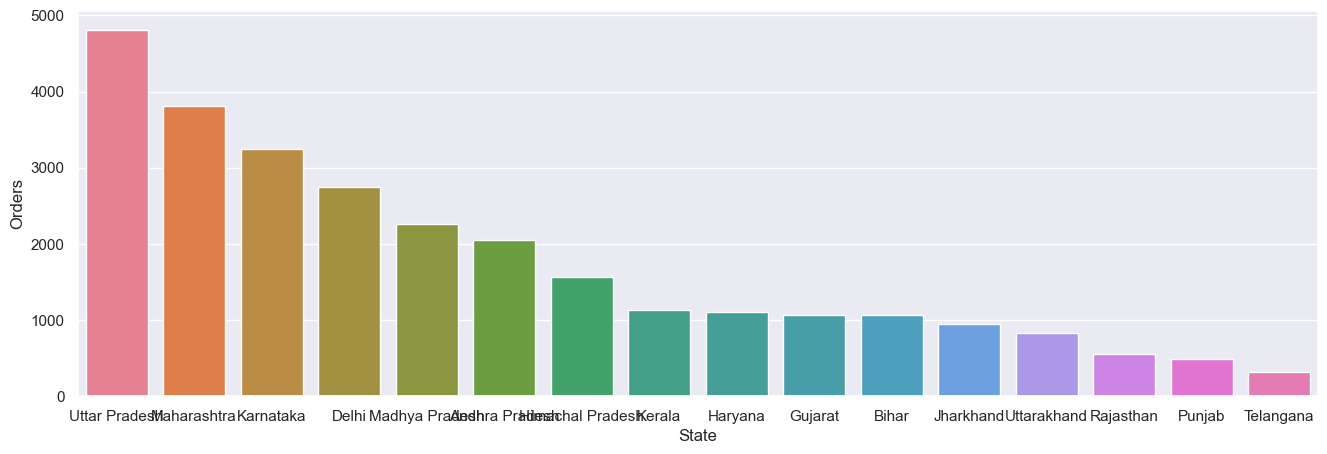

In [23]:
# Total number of orders from different states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Orders', data = sales_state, hue = 'State', legend = False)

<Axes: xlabel='State', ylabel='Orders'>

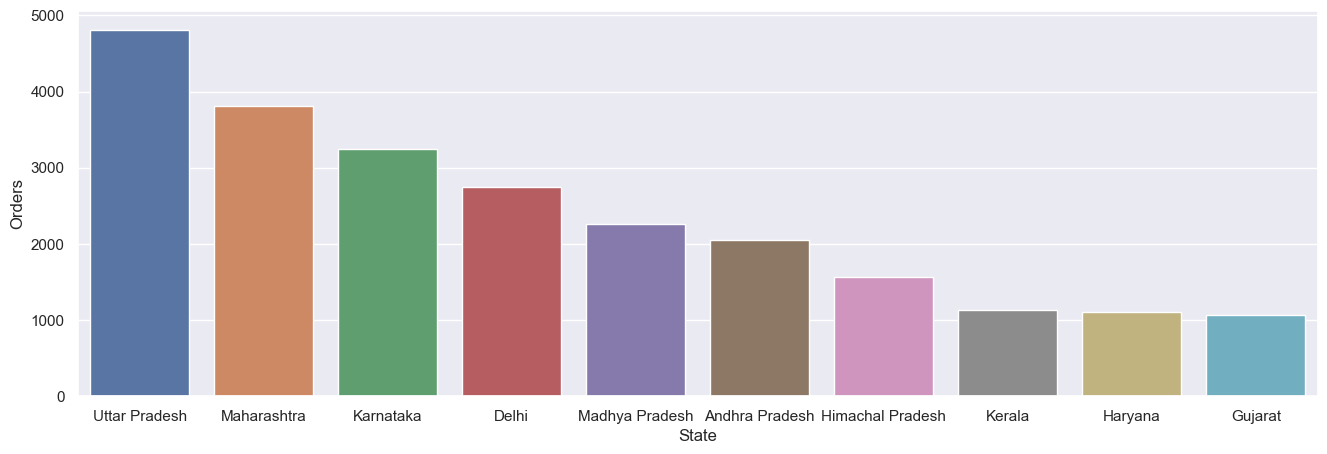

In [33]:
# Total number of orders from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Orders', data = sales_state, hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

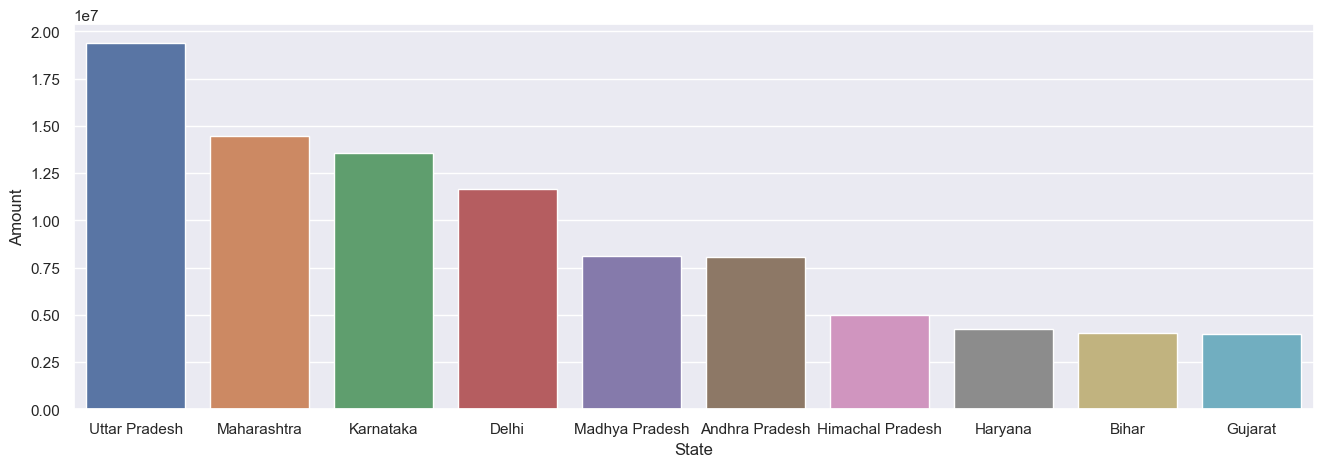

In [34]:
# Total number of amount from top 10 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Amount', data = sales_state, hue = 'State')

<Axes: xlabel='State', ylabel='Orders'>

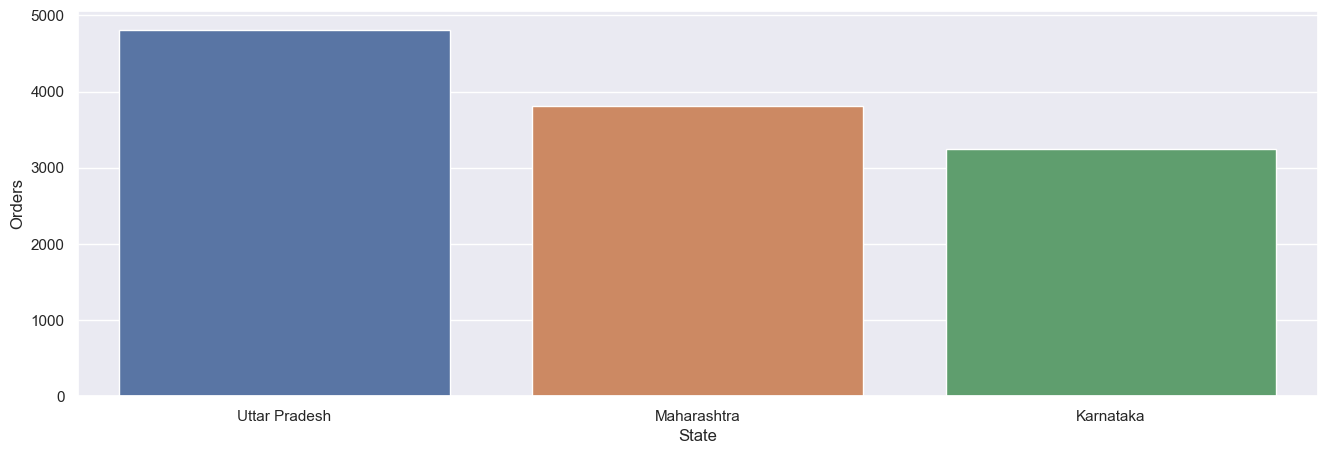

In [35]:
# Total number of orders from top 3 states
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(3)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Orders', data = sales_state, hue = 'State')

<Axes: xlabel='State', ylabel='Amount'>

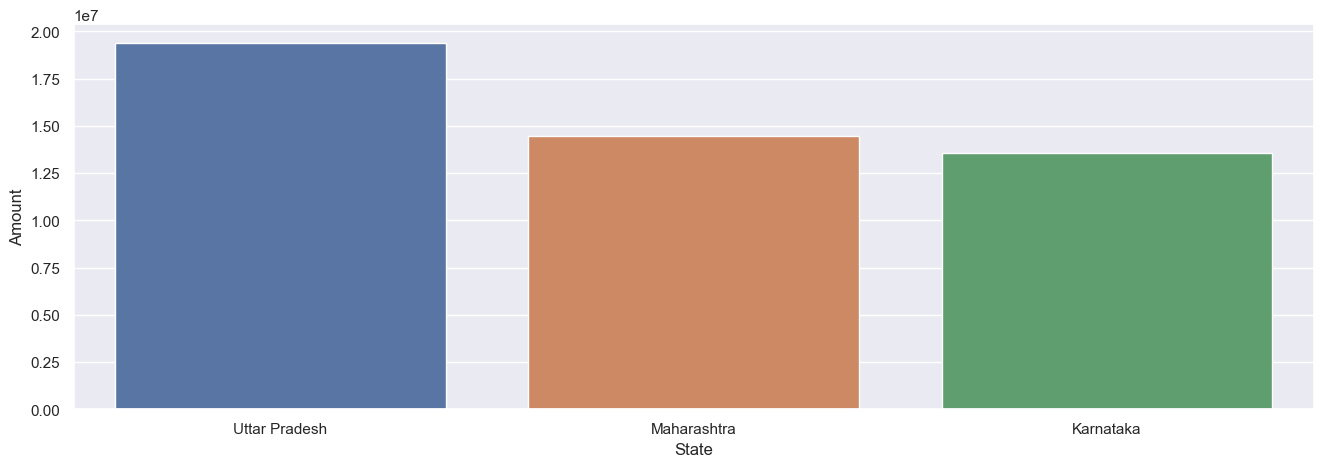

In [37]:
# Total number of amount from top 3 states
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(3)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'State', y = 'Amount', data = sales_state, hue = 'State')

From the above two graphs, we can see that most of the orders and total sales/ amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

Marital Status

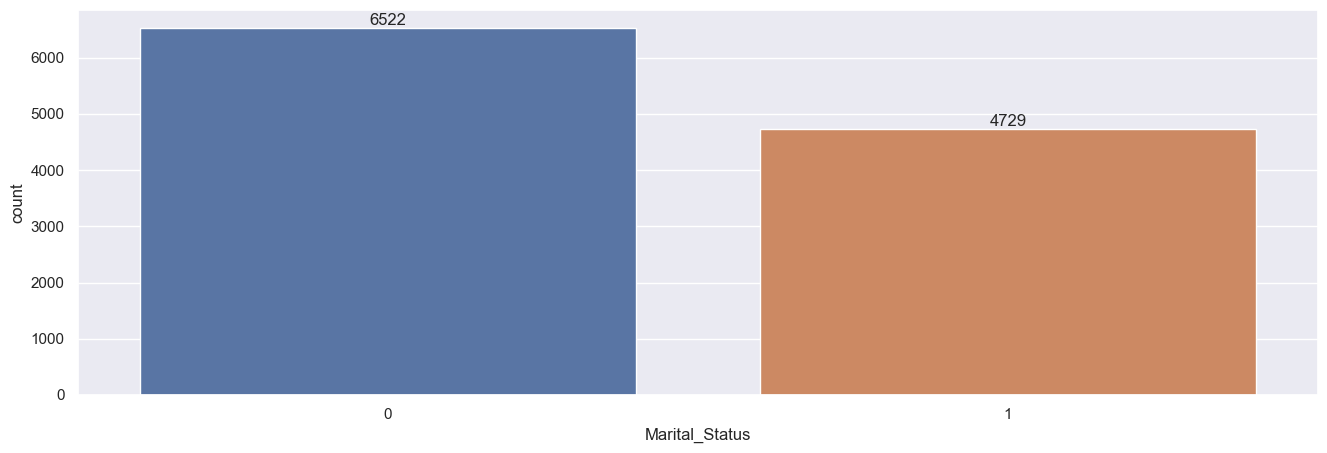

In [38]:
ax = sns.countplot(x = "Marital_Status", data = df, hue = "Marital_Status", legend = False)

sns.set(rc= {'figure.figsize': (7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

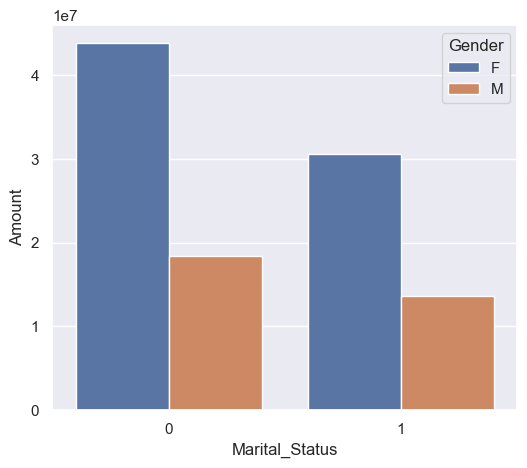

In [39]:
sales_state = df.groupby(["Marital_Status", "Gender"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc= {"figure.figsize" : (6,5)})
sns.barplot(data = sales_state, x = "Marital_Status", y = "Amount", hue = "Gender")

From above two graphs, we can see that most of the buyers unmarried women and they have high purchasing power

Occupation

In [40]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

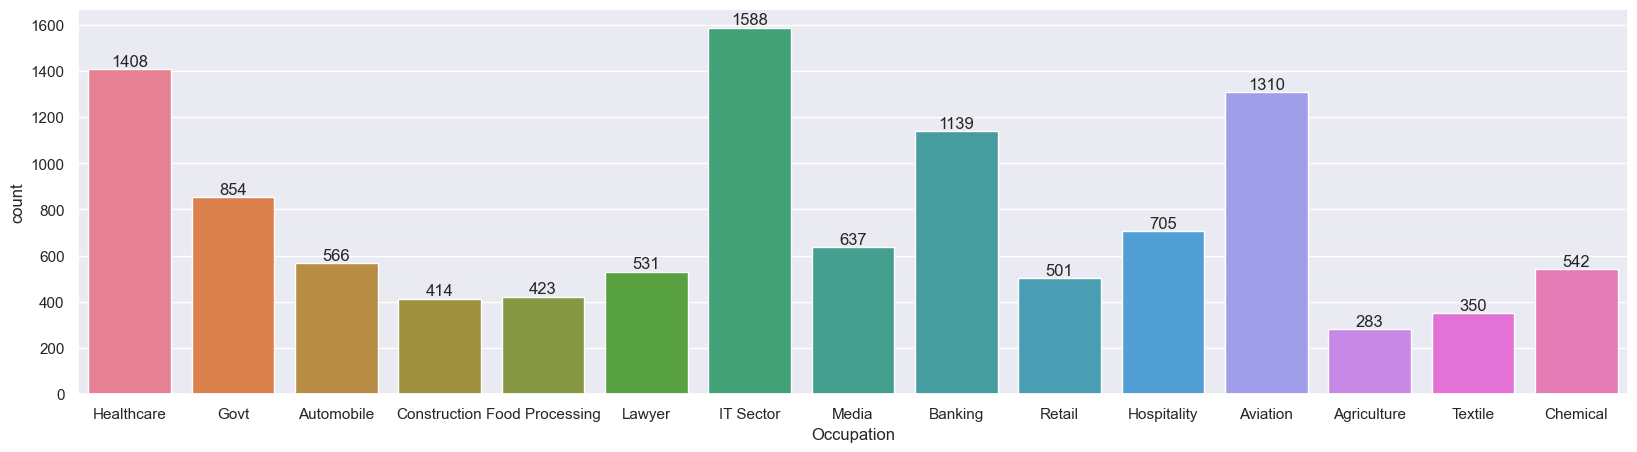

In [42]:
ax = sns.countplot(x = "Occupation", data = df, hue = "Occupation")
sns.set(rc= {'figure.figsize': (20,10)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

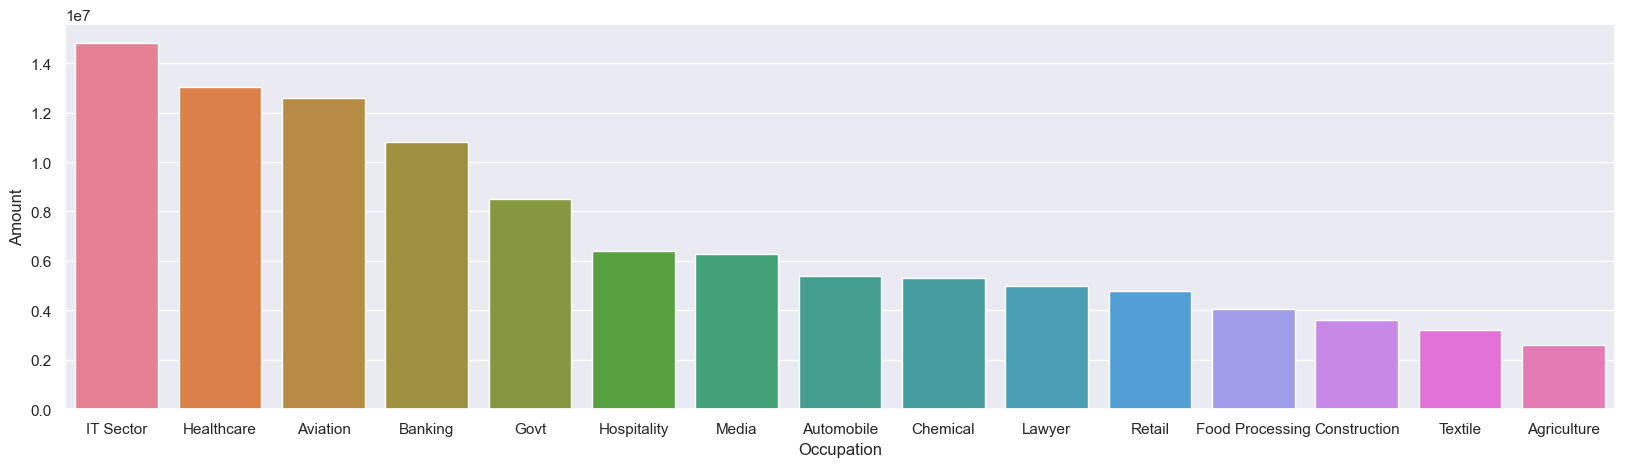

In [43]:
sales_state = df.groupby(["Occupation"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc= {"figure.figsize": (20,5)})
sns.barplot(data = sales_state, x = "Occupation", y = "Amount", hue = "Occupation")

From above graphs, we can see that most of the buyers are working in IT Sector, Healthcare and Aviation.

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

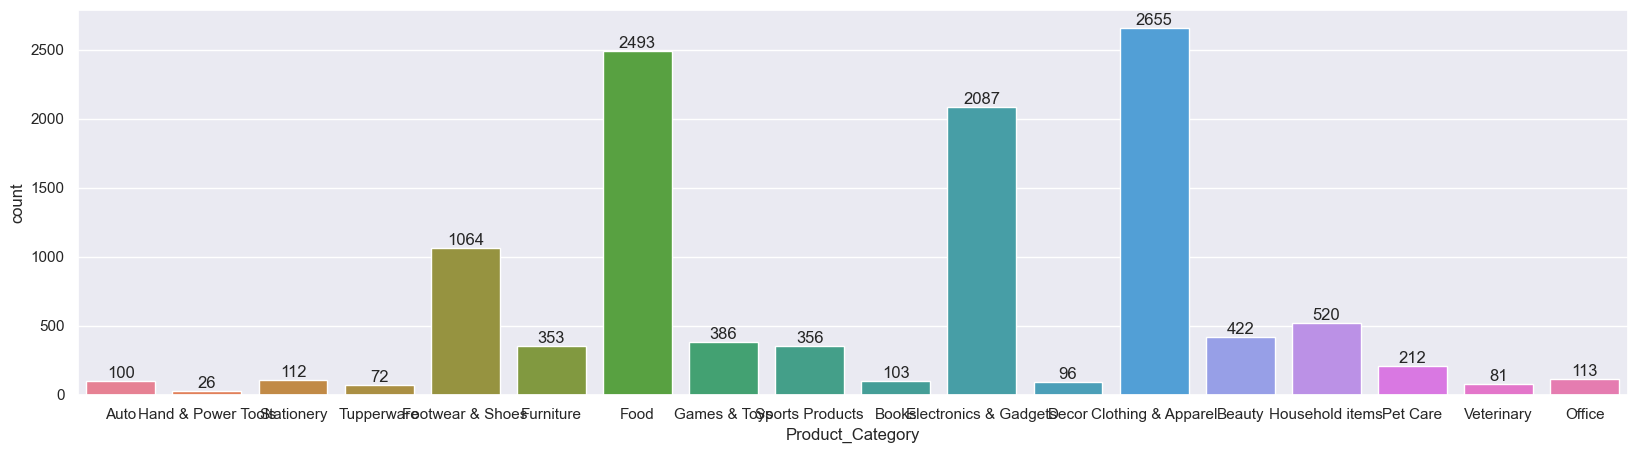

In [47]:
sns.set(rc= {"figure.figsize": (20,5)})

ax = sns.countplot(x = "Product_Category", data = df, hue = "Product_Category")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

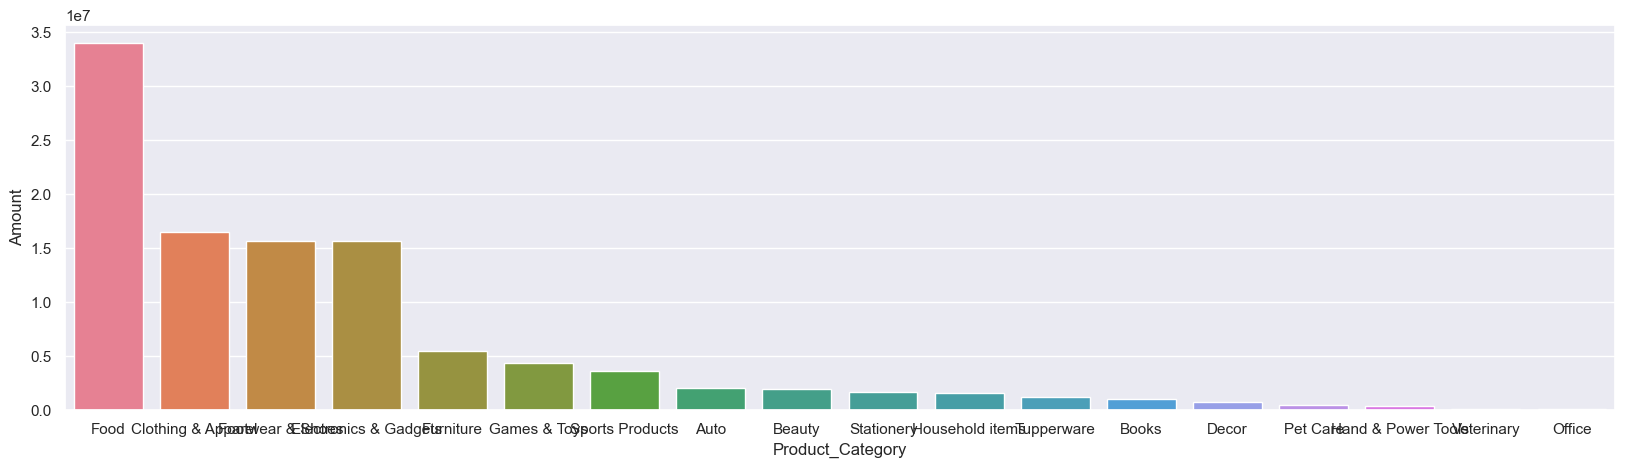

In [49]:
sales_state = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False)

sns.set(rc= {"figure.figsize": (20,5)})
sns.barplot(data = sales_state, x = "Product_Category", y = "Amount", hue = "Product_Category")

<Axes: xlabel='Product_Category', ylabel='Amount'>

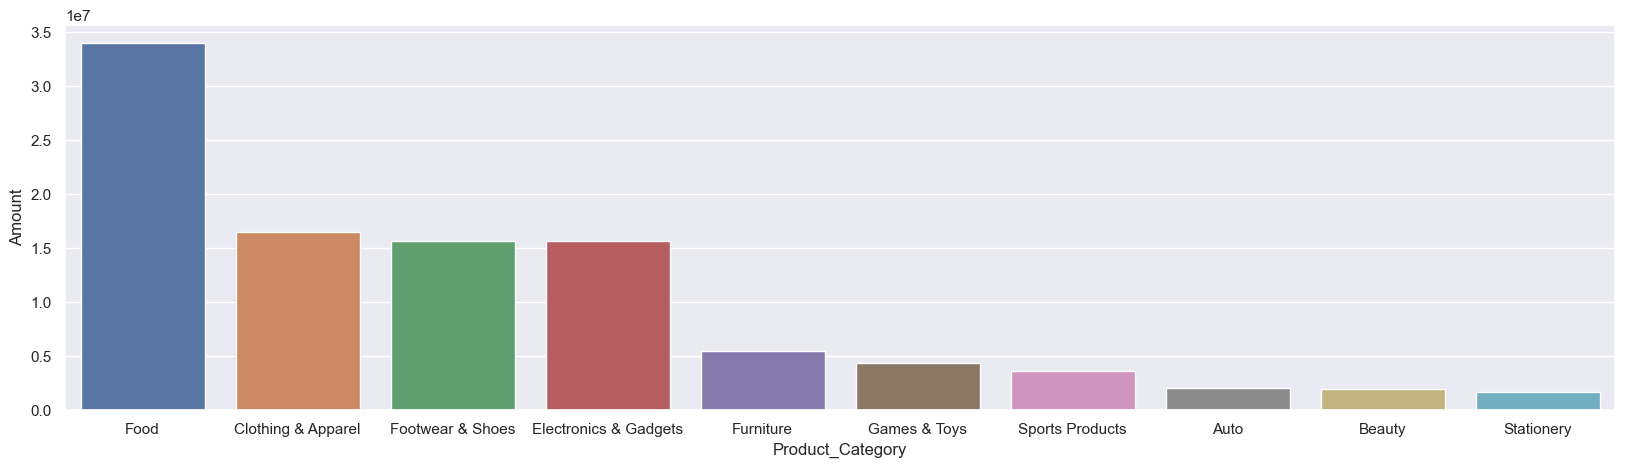

In [44]:
sales_state = df.groupby(["Product_Category"], as_index = False)["Amount"].sum().sort_values(by = "Amount", ascending = False).head(10)

sns.set(rc= {"figure.figsize": (20,5)})
sns.barplot(data = sales_state, x = "Product_Category", y = "Amount", hue = "Product_Category")

From above graphs we can see that most of the sold porducts are from Food, Clothing & Apparel and Footwear & Shoes category.

Product_ID

In [45]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age', 'Marital_Status',
       'State', 'Zone', 'Occupation', 'Product_Category', 'Orders', 'Amount',
       'Status', 'Unnamed', 'Age_Group'],
      dtype='object')

<Axes: xlabel='Product_ID', ylabel='Orders'>

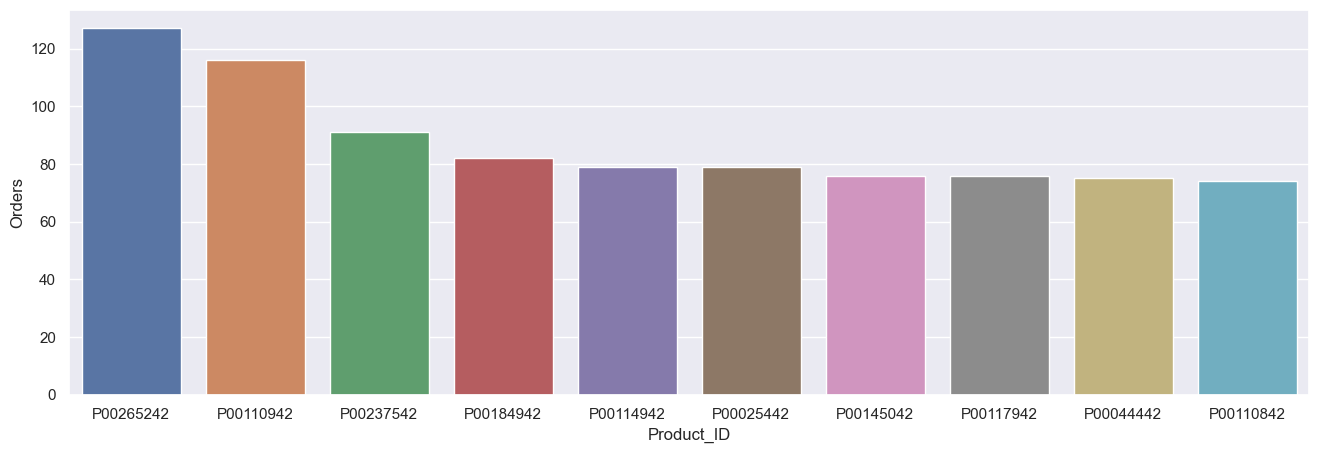

In [3]:
# Top 10 Product IDs of orders
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.set(rc = {'figure.figsize': (16,5)})

sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_state, hue = 'Product_ID')

<Axes: xlabel='Product_ID'>

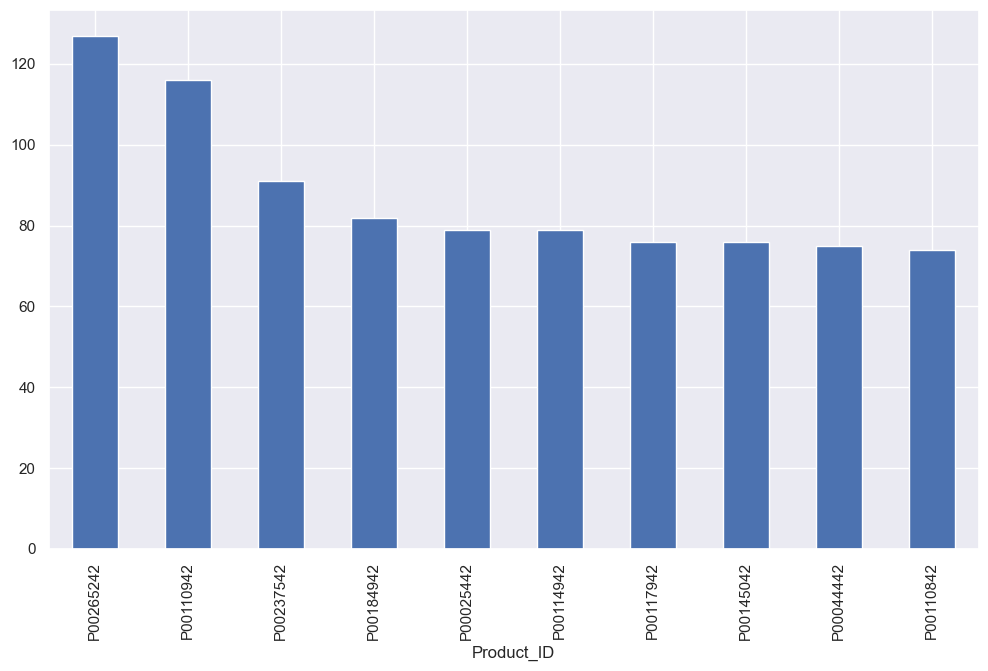

In [9]:
# Top 10 most sold products

fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

From the above graph we find that the product Ids (P00265242, P00110942, P00237542) of this product are mostly sold products.

So the conclusion is, Unmarried women, aged between 26-35 year old, from Uttar Pradesh, Maharashtra and Karnataka, working in IT sector, Health Care and Aviation, are more likely to buy products from Food, Clothing and Electronics category